# Income of Adults
#### Group num 20
Members of the group:

Moria Abadi,

Roi Sharabi,

Ori Torem,

Yair Hubara

link to data : https://www.kaggle.com/datasets/ddmasterdon/income-adult

Importing libraries

In [345]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import sklearn as sk
from sklearn import tree
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error
from sklearn.tree import DecisionTreeRegressorS

<img src= "https://github.com/moriaabdai/project---income-of-adults/blob/main/image.jpg?raw=true"  width="400"/>

---

### 1. data setting
based on 1994 US Census Data

In [74]:
url = 'https://raw.githubusercontent.com/roi3089/project-/main/adult_data.csv'
data = pd.read_csv(url)

In [75]:
data.head(10)

,age,workclass,fnlwgt,education,education-num,marital-status,occupation,relationship,race,sex,capital-gain,capital-loss,hours-per-week,native-country,salary
0,39,State-gov,77516,Bachelors,13,Never-married,Adm-clerical,Not-in-family,White,Male,2174,0,40,United-States,<=50K
1,50,Self-emp-not-inc,83311,Bachelors,13,Married-civ-spouse,Exec-managerial,Husband,White,Male,0,0,13,United-States,<=50K
2,38,Private,215646,HS-grad,9,Divorced,Handlers-cleaners,Not-in-family,White,Male,0,0,40,United-States,<=50K
3,53,Private,234721,11th,7,Married-civ-spouse,Handlers-cleaners,Husband,Black,Male,0,0,40,United-States,<=50K
4,28,Private,338409,Bachelors,13,Married-civ-spouse,Prof-specialty,Wife,Black,Female,0,0,40,Cuba,<=50K
5,37,Private,284582,Masters,14,Married-civ-spouse,Exec-managerial,Wife,White,Female,0,0,40,United-States,<=50K
6,49,Private,160187,9th,5,Married-spouse-absent,Other-service,Not-in-family,Black,Female,0,0,16,Jamaica,<=50K
7,52,Self-emp-not-inc,209642,HS-grad,9,Married-civ-spouse,Exec-managerial,Husband,White,Male,0,0,45,United-States,>50K
8,31,Private,45781,Masters,14,Never-married,Prof-specialty,Not-in-family,White,Female,14084,0,50,United-States,>50K
9,42,Private,159449,Bachelors,13,Married-civ-spouse,Exec-managerial,Husband,White,Male,5178,0,40,United-States,>50K


In [76]:
data.shape

(32561, 15)

Check for missing values and kind of columns

In [77]:
data_fix = data.isnull().sum().to_frame().rename(columns={0: "Nan values"})
dtype = data.dtypes.to_dict()
data_fix["Dtype"] = dtype.values()
data_fix

,Nan values,Dtype
age,0,int64
workclass,0,object
fnlwgt,0,int64
education,0,object
education-num,0,int64
marital-status,0,object
occupation,0,object
relationship,0,object
race,0,object
sex,0,object


rename the columns names :

In [78]:
data = data.rename(columns={' workclass': 'workclass', ' fnlwgt':'fnlwgt', ' education':'education', ' education-num':'education_num', ' marital-status':'marital_status',' occupation':'occupation',' relationship':'relationship',' race':'race', ' sex':'sex', ' capital-gain':'capital_gain',' capital-loss':'capital_loss',' hours-per-week':'hours_per_week',' native-country':'native_country', ' salary':'salary'})

changing the values in the salary columns and sepaerateing them:

In [79]:
x = data.copy()

In [80]:
y = x.replace(' <=50K' , 0)
data = y.replace(' >50K' , 1)

In [497]:
data.loc[data.salary==0,'salary_down']=1
data.loc[data.salary==1,'salary_up']=1
data['salary_down'] = data['salary_down'].fillna(0)
data['salary_up'] = data['salary_up'].fillna(0)
data.head(3)

,age,workclass,fnlwgt,education,education_num,marital_status,occupation,relationship,race,sex,...,hours_per_week_40,hours_per_week_cat,groups_age,groups_age_cat,sex_cat,relationship_cat,education_cat,occupation_cat,workclass_cat,native_country_cat
0,39,State-gov,77516,Bachelors,13,Never-married,Adm-clerical,Not-in-family,White,Male,...,"(39, 40]",1,"(30, 40]",2,1,1,9,1,7,39
1,50,Self-emp-not-inc,83311,Bachelors,13,Married-civ-spouse,Exec-managerial,Husband,White,Male,...,"(0, 39]",0,"(40, 50]",3,1,0,9,4,6,39
2,38,Private,215646,HS-grad,9,Divorced,Handlers-cleaners,Not-in-family,White,Male,...,"(39, 40]",1,"(30, 40]",2,1,1,11,6,4,39


---
### 2. analyzing by hours:

Separate the work hours column to 3 groups

In [83]:
data_hours_per_week = data.groupby("hours_per_week")[["hours_per_week"]].sum()
data["hours_per_week_40"] = pd.cut(data.hours_per_week,[0, 39, 40, 99])
data['hours_per_week_cat'] = data['hours_per_week_40'].astype('category').cat.codes
data.head(10)

,age,workclass,fnlwgt,education,education_num,marital_status,occupation,relationship,race,sex,capital_gain,capital_loss,hours_per_week,native_country,salary,salary_down,salary_up,hours_per_week_40,hours_per_week_cat
0,39,State-gov,77516,Bachelors,13,Never-married,Adm-clerical,Not-in-family,White,Male,2174,0,40,United-States,0,1.0,0.0,"(39, 40]",1
1,50,Self-emp-not-inc,83311,Bachelors,13,Married-civ-spouse,Exec-managerial,Husband,White,Male,0,0,13,United-States,0,1.0,0.0,"(0, 39]",0
2,38,Private,215646,HS-grad,9,Divorced,Handlers-cleaners,Not-in-family,White,Male,0,0,40,United-States,0,1.0,0.0,"(39, 40]",1
3,53,Private,234721,11th,7,Married-civ-spouse,Handlers-cleaners,Husband,Black,Male,0,0,40,United-States,0,1.0,0.0,"(39, 40]",1
4,28,Private,338409,Bachelors,13,Married-civ-spouse,Prof-specialty,Wife,Black,Female,0,0,40,Cuba,0,1.0,0.0,"(39, 40]",1
5,37,Private,284582,Masters,14,Married-civ-spouse,Exec-managerial,Wife,White,Female,0,0,40,United-States,0,1.0,0.0,"(39, 40]",1
6,49,Private,160187,9th,5,Married-spouse-absent,Other-service,Not-in-family,Black,Female,0,0,16,Jamaica,0,1.0,0.0,"(0, 39]",0
7,52,Self-emp-not-inc,209642,HS-grad,9,Married-civ-spouse,Exec-managerial,Husband,White,Male,0,0,45,United-States,1,0.0,1.0,"(40, 99]",2
8,31,Private,45781,Masters,14,Never-married,Prof-specialty,Not-in-family,White,Female,14084,0,50,United-States,1,0.0,1.0,"(40, 99]",2
9,42,Private,159449,Bachelors,13,Married-civ-spouse,Exec-managerial,Husband,White,Male,5178,0,40,United-States,1,0.0,1.0,"(39, 40]",1


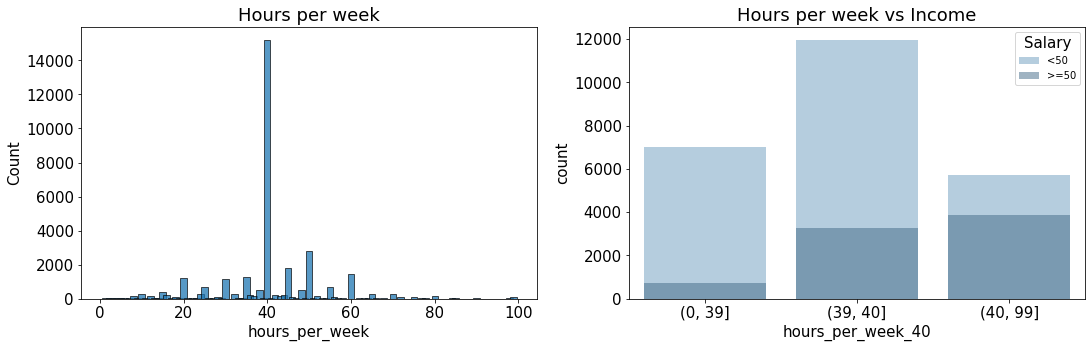

In [399]:
fig, axes = plt.subplots(figsize=(18, 5), ncols=2);
sns.histplot(data=data, x='hours_per_week',  ax = axes[0], shrink = 5);
axes[0].set_title("Hours per week")
sns.countplot(ax=axes[1], x="hours_per_week_40", data=data, hue = 'salary', alpha = 0.5,  dodge = False, palette="Blues_d");
axes[1].set_title("Hours per week vs Income")
plt.legend(title='Salary', loc='upper right', labels=['<50', '>=50'])
plt.show;

Looking at the left graph:

The vast majority of people work 40 hours a week - which is now accepted in the social norm.


Looking at the right graph:

It can be seen that the percentage of people earning over $ 50,000 drops drastically when working less than 40 hours a week, and goes up when working over 40 hours a week.

---
### 3. analyzing by age:

In [114]:
data_age = data.groupby("groups_age")[["age"]].count()
data_age["ave_salary"] = data.groupby("groups_age")[["salary"]].mean()
data_age["ave_eduction_num"] = data.groupby("groups_age")[["education_num"]].mean()
data_age["ave_capital_gain"] = data.groupby("groups_age")[["capital_gain"]].mean()
data_age["ave_hours_per_week"] = data.groupby("groups_age")[["hours_per_week"]].mean()
data_age = data_age.rename(columns={'age': 'age_count'})
data_age = data_age.reset_index()
data_age

,groups_age,age_count,ave_salary,ave_eduction_num,ave_capital_gain,ave_hours_per_week
0,"(10, 20]",2410,0.000830,8.557676,94.343568,28.565145
1,"(20, 30]",8162,0.083313,10.087846,377.601201,39.570938
2,"(30, 40]",8546,0.281535,10.355371,1028.831032,43.272525
3,"(40, 50]",6983,0.380209,10.549048,1674.111986,43.382787
4,"(50, 60]",4128,0.374758,9.936289,1753.673450,42.363857
5,"(60, 70]",1792,0.255022,9.531250,1722.987165,35.061942
6,"(70, 80]",441,0.181406,9.287982,1955.190476,26.031746
7,"(80, 90]",99,0.141414,9.313131,1093.585859,29.555556


In [119]:
data_age2 = data.groupby("age")[["age"]].count()
data_age2["ave_salary"] = data.groupby("age")[["salary"]].mean()

data_age2["ave_eduction_num"] = data.groupby("age")[["education_num"]].mean()
data_age2["ave_capital_gain"] = data.groupby("age")[["capital_gain"]].mean()
data_age2["ave_hours_per_week"] = data.groupby("age")[["hours_per_week"]].mean()

data_age2 = data_age2.rename(columns={'age': 'age_count'})
data_age2 = data_age2.reset_index()

Separate the age column to 8 groups

In [86]:
data["groups_age"] = pd.cut(data.age,[10, 20, 30 , 40, 50, 60, 70, 80, 90])
data['groups_age_cat'] = data['groups_age'].astype('category').cat.codes
data.head(10)

,age,workclass,fnlwgt,education,education_num,marital_status,occupation,relationship,race,sex,...,capital_loss,hours_per_week,native_country,salary,salary_down,salary_up,hours_per_week_40,hours_per_week_cat,groups_age,groups_age_cat
0,39,State-gov,77516,Bachelors,13,Never-married,Adm-clerical,Not-in-family,White,Male,...,0,40,United-States,0,1.0,0.0,"(39, 40]",1,"(30, 40]",2
1,50,Self-emp-not-inc,83311,Bachelors,13,Married-civ-spouse,Exec-managerial,Husband,White,Male,...,0,13,United-States,0,1.0,0.0,"(0, 39]",0,"(40, 50]",3
2,38,Private,215646,HS-grad,9,Divorced,Handlers-cleaners,Not-in-family,White,Male,...,0,40,United-States,0,1.0,0.0,"(39, 40]",1,"(30, 40]",2
3,53,Private,234721,11th,7,Married-civ-spouse,Handlers-cleaners,Husband,Black,Male,...,0,40,United-States,0,1.0,0.0,"(39, 40]",1,"(50, 60]",4
4,28,Private,338409,Bachelors,13,Married-civ-spouse,Prof-specialty,Wife,Black,Female,...,0,40,Cuba,0,1.0,0.0,"(39, 40]",1,"(20, 30]",1
5,37,Private,284582,Masters,14,Married-civ-spouse,Exec-managerial,Wife,White,Female,...,0,40,United-States,0,1.0,0.0,"(39, 40]",1,"(30, 40]",2
6,49,Private,160187,9th,5,Married-spouse-absent,Other-service,Not-in-family,Black,Female,...,0,16,Jamaica,0,1.0,0.0,"(0, 39]",0,"(40, 50]",3
7,52,Self-emp-not-inc,209642,HS-grad,9,Married-civ-spouse,Exec-managerial,Husband,White,Male,...,0,45,United-States,1,0.0,1.0,"(40, 99]",2,"(50, 60]",4
8,31,Private,45781,Masters,14,Never-married,Prof-specialty,Not-in-family,White,Female,...,0,50,United-States,1,0.0,1.0,"(40, 99]",2,"(30, 40]",2
9,42,Private,159449,Bachelors,13,Married-civ-spouse,Exec-managerial,Husband,White,Male,...,0,40,United-States,1,0.0,1.0,"(39, 40]",1,"(40, 50]",3


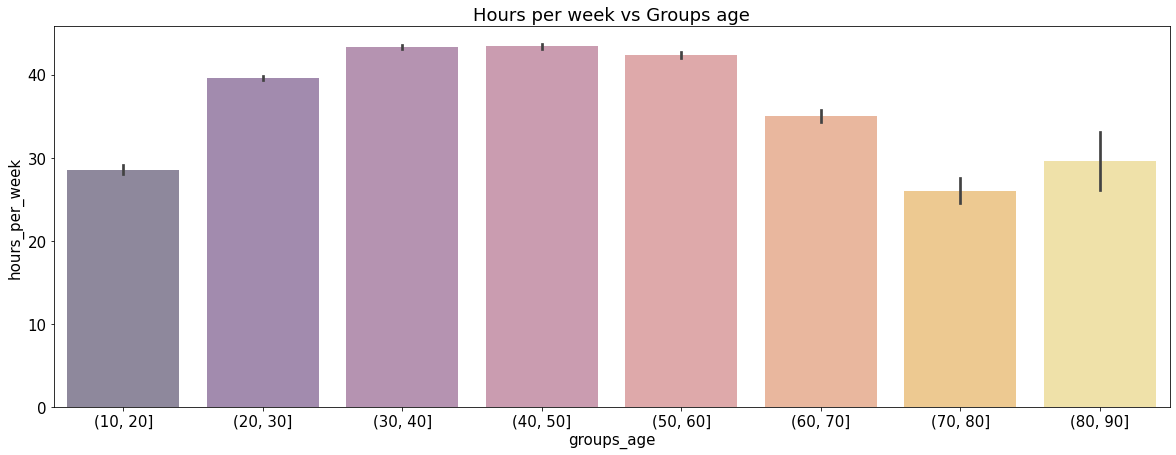

In [412]:
plt.subplots(figsize = (20,7))
sns.barplot(data = data, x = 'groups_age' , y = "hours_per_week", alpha = 0.5, palette ="inferno").set(title = "Hours per week vs Groups age");

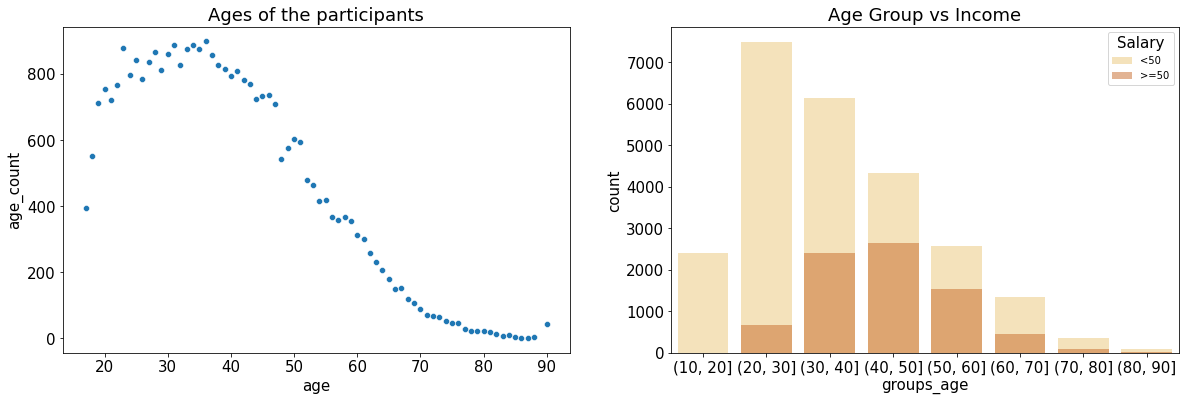

In [483]:
fig, axes = plt.subplots(figsize=(20, 6), ncols=2)
sns.scatterplot(data=data_age2, x = "age", y = "age_count", ax = axes[0])
sns.countplot(ax=axes[1], x="groups_age", data=data, hue = 'salary', palette="YlOrBr", dodge = False, alpha = 0.5)
plt.legend(title='Salary', loc='upper right', labels=['<50', '>=50'])
axes[0].set_title("Ages of the participants")
axes[1].set_title("Age Group vs Income")
plt.show;

It can be seen in the left graph that most people in the study are between the ages of 35 and 50.

From the right graph you can see that the higher salaries are between ages 40-60 and then the salary goes down again.

The distribution of working hours between the ages of 17-70 can be seen as we would expect.

But at the age of 80 there is a big jump in the number of working hours per week.

We believe that,
Older people want to keep themselves busy during the day and not sit at home without doing anything, which can lead to faster degeneration of both the brain and the body.

---
### 4. analyzing by marital_status:

In [258]:
data_marital_status = data.groupby("marital_status")[["marital_status"]].count()
data_marital_status["ave_salary"] = data.groupby("marital_status")[["salary"]].mean()
data_marital_status["ave_eduction_num"] = data.groupby("marital_status")[["education_num"]].mean()
data_marital_status["ave_hours_per_week"] = data.groupby("workclass")[["hours_per_week"]].mean()
data_marital_status = data_marital_status.rename(columns={'marital_status': 'marital_status_count'})
data_marital_status = data_marital_status.reset_index()
data_marital_status

,marital_status,marital_status_count,ave_salary,ave_eduction_num,ave_hours_per_week
0,Divorced,4443,0.104209,10.030385,NaN
1,Married-AF-spouse,23,0.434783,10.173913,NaN
2,Married-civ-spouse,14976,0.446848,10.320646,NaN
3,Married-spouse-absent,418,0.081340,9.308612,NaN
4,Never-married,10683,0.045961,9.962464,NaN
5,Separated,1025,0.064390,9.293659,NaN
6,Widowed,993,0.085599,9.093656,NaN


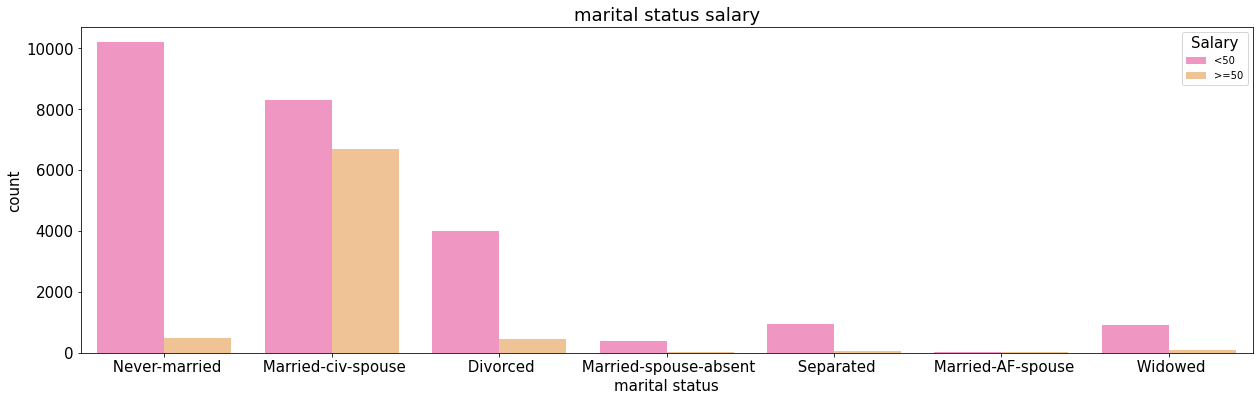

In [502]:
fig, axes = plt.subplots(figsize=(21, 6))
sns.countplot(x = "marital_status" , data = data, hue="salary" , palette = "spring", alpha = 0.7)
plt.legend(title='Salary', loc='upper right', labels=['<50', '>=50']);
plt.title("marital status salary")
plt.ylabel("count")
plt.xlabel("marital status")
plt.show()

Both the table and the graph show that married couples earn more than unmarried couples.

Which is quite surprising, one might think that couples who do not have a family will have more leisure time for a career, but we see the opposite.

We might conclude that people with family see more reasons to succeed in life because they have something to work for, and there are those who appreciate their success.

---
### 5. anlayzing by sex:

In [ ]:
data_sex = data.groupby("sex")[["sex"]].count()
data_sex["ave_salary"] = data.groupby("sex")[["salary"]].mean()
data_sex["ave_eduction_num"] = data.groupby("sex")[["education_num"]].mean()
data_sex["ave_capital_gain"] = data.groupby("sex")[["capital_gain"]].mean()
data_sex["ave_hours_per_week"] = data.groupby("sex")[["hours_per_week"]].mean()
data_sex = data_sex.rename(columns={'sex': 'sex_count'})
data_sex = data_sex.reset_index()
data_sex

,sex,sex_count,ave_salary,ave_eduction_num,ave_capital_gain,ave_hours_per_week
0,Female,10771,0.109461,10.035744,568.410547,36.410361
1,Male,21790,0.305737,10.102891,1329.370078,42.428086


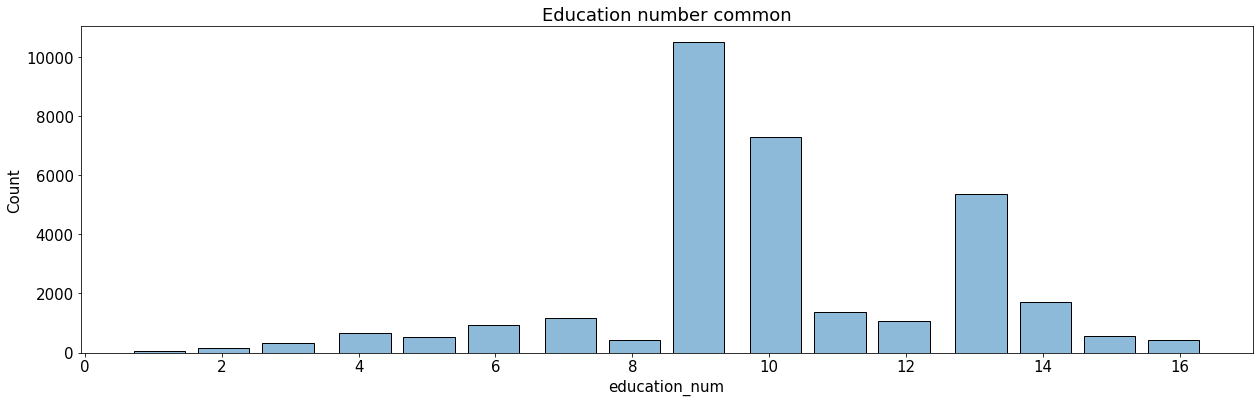

In [499]:
plt.subplots(figsize = (21, 6))
plt.rc('legend', fontsize=10)
sns.histplot(data = data, x = "education_num", alpha = 0.5,shrink=4).set(title = "Education number common"); 


we will check the most common years of education num.

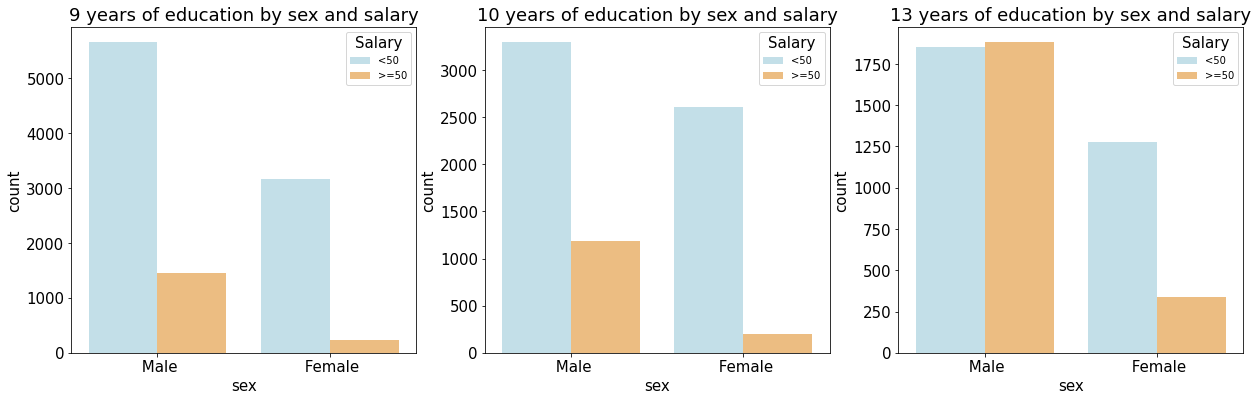

In [495]:
fig, axes = plt.subplots(figsize=(21, 6), ncols=3);

years_data9 = data.loc[(data.education_num == 9)].copy()
sns.countplot(ax = axes[0], x = "sex" , data = years_data9, hue="salary" , palette="RdYlBu_r")
axes[0].legend(title='Salary', loc='upper right', labels=['<50', '>=50']);

years_data10 = data.loc[(data.education_num == 10)].copy()
sns.countplot(ax = axes[1], x = "sex" , data = years_data10, hue="salary" , palette="RdYlBu_r")
axes[1].legend(title='Salary', loc='upper right', labels=['<50', '>=50']);

years_data13 = data.loc[(data.education_num == 13)].copy()
sns.countplot(ax = axes[2], x = "sex" , data = years_data13, hue="salary" , palette="RdYlBu_r")
axes[2].legend(title='Salary', loc='upper right', labels=['<50', '>=50']);

axes[0].set_title("9 years of education by sex and salary")
axes[1].set_title("10 years of education by sex and salary")
axes[2].set_title("13 years of education by sex and salary");

We see that after 13 years of education, which is Bachelor,  the amount of men earning over 50K is higher than those earning less than 50K, we will also look at what happens after 14 years of schooling, which is a master's degree.

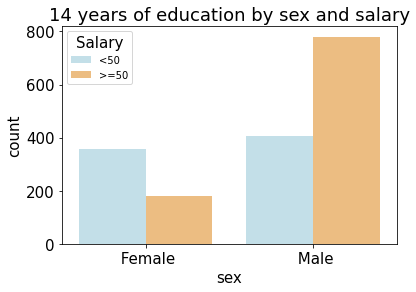

In [496]:
years_data14 = data.loc[(data.education_num == 14)].copy()
sns.countplot(x = "sex" , data = years_data14, hue="salary" , palette="RdYlBu_r").set(title = "14 years of education by sex and salary")
plt.legend(title='Salary', loc='upper left', labels=['<50', '>=50']);

We can see that the salaries goes up dramatically , and the number of women is slightly rising, but not drastically between the years, like the number of men does.

> ## First conclusion :

We compared men and women in the most common years of education, it can be seen that even when men and women study the same amount of education years , the number of men who earn over 50K is significantly higher than the number of women who earn that way.

---
### 6. analyzing by workclass:

droping the irrelevant values

In [239]:
droped_data = data.loc[(data.workclass != ' Without-pay')]
droped_data = droped_data.loc[(data.workclass != ' Never-worked')]

In [241]:
data_workclass = droped_data.groupby("workclass")[["workclass"]].count()
data_workclass["ave_salary"] = droped_data.groupby("workclass")[["salary"]].mean()
data_workclass["ave_eduction_num"] = droped_data.groupby("workclass")[["education_num"]].mean()
data_workclass["ave_hours_per_week"] = droped_data.groupby("workclass")[["hours_per_week"]].mean()
data_workclass = data_workclass.rename(columns={'workclass': 'workclass_count'})
data_workclass = data_workclass.reset_index()
data_workclass

,workclass,workclass_count,ave_salary,ave_eduction_num,ave_hours_per_week
0,?,1836,0.104031,9.260349,31.919390
1,Federal-gov,960,0.386458,10.973958,41.379167
2,Local-gov,2093,0.294792,11.042045,40.982800
3,Private,22696,0.218673,9.879714,40.267096
4,Self-emp-inc,1116,0.557348,11.137097,48.818100
5,Self-emp-not-inc,2541,0.284927,10.226289,44.421881
6,State-gov,1298,0.271957,11.375963,39.031587


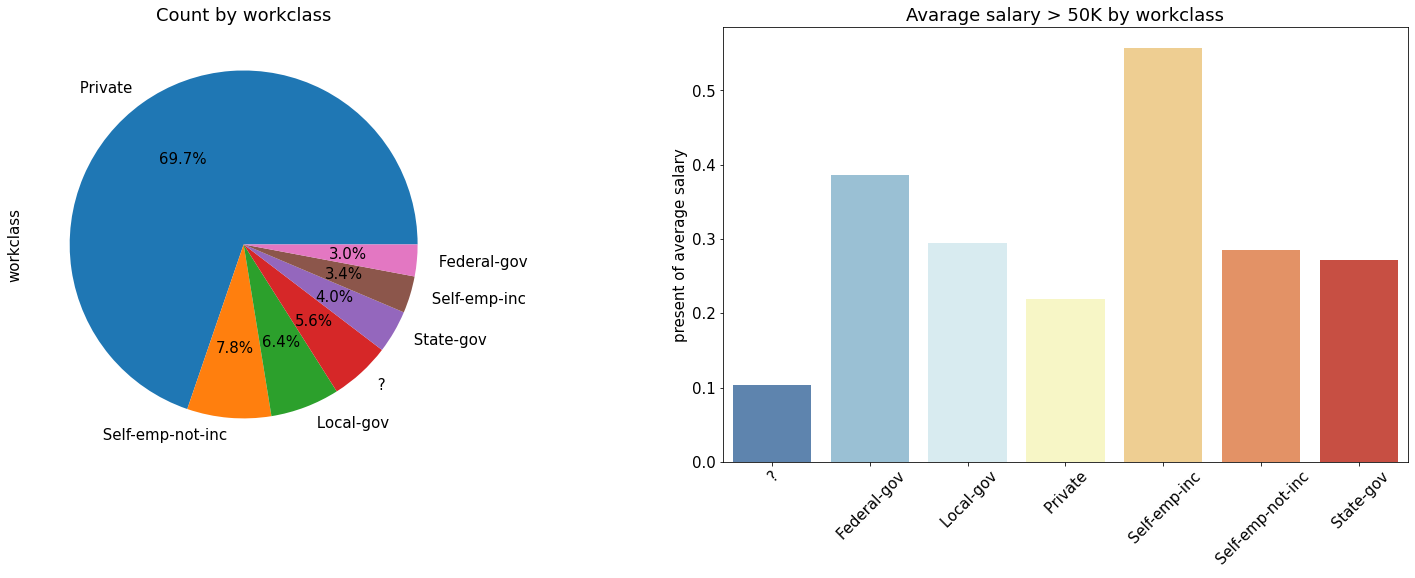

In [477]:
fig, axes = plt.subplots(figsize=(27, 8), ncols=2)

droped_data['workclass'].value_counts().plot.pie(autopct="%1.1f%%" , ax = axes[0]) 
axes[0].set_title("Count by workclass")

sns.barplot(x = "workclass" , y = "ave_salary", data = data_workclass, ax = axes[1], palette="RdYlBu_r")
#plt.rc('font', size=15) 
axes[1].tick_params(axis='x', rotation=45)
axes[1].set_title("Avarage salary > 50K by workclass")
plt.ylabel("present of average salary")
plt.xlabel("")
plt.show()

> ## Second conclusion :

As we can see from the data, the jobs that earn the most are the jobs in which the employees are self-employed.

Today there is a very clear path that education and parents directs us to.

Study properly , graduate college and then find a promising job as an employee.

Apparently this is not true, the people who took a risk and tried to turn to the independent market at 55 percent earned high salaries, it may be worthwhile to change our attitude regarding work and studies.

---
### 7. analyzing by native:

In [388]:
data_native_country = data.groupby("native_country")[["native_country"]].count()
data_native_country["ave_salary"] = data.groupby("native_country")[["salary"]].mean()
data_native_country["ave_eduction_num"] = data.groupby("native_country")[["education_num"]].sum()
data_native_country["ave_hours_per_week"] = data.groupby("native_country")[["hours_per_week"]].mean()
data_native_country = data_native_country.rename(columns={'native_country' :'native_country_count'})
data_native_country = data_native_country.reset_index()
data_native_country.tail()

,native_country,native_country_count,ave_salary,ave_eduction_num,ave_hours_per_week
37,Thailand,18,0.166667,197,45.444444
38,Trinadad&Tobago,19,0.105263,157,37.368421
39,United-States,29170,0.245835,296643,40.447755
40,Vietnam,67,0.074627,647,37.343284
41,Yugoslavia,16,0.375000,159,44.562500


buulding two new datas, one by usa only, and one by immigrants only.

In [108]:
immigrant_data = data.loc[data.native_country != ' United-States'].copy()
immigrant_data['native_country'] = 'immigrant'
immigrant_data.head(3)

,age,workclass,fnlwgt,education,education_num,marital_status,occupation,relationship,race,sex,...,capital_loss,hours_per_week,native_country,salary,salary_down,salary_up,hours_per_week_40,hours_per_week_cat,groups_age,groups_age_cat
4,28,Private,338409,Bachelors,13,Married-civ-spouse,Prof-specialty,Wife,Black,Female,...,0,40,immigrant,0,1.0,0.0,"(39, 40]",1,"(20, 30]",1
6,49,Private,160187,9th,5,Married-spouse-absent,Other-service,Not-in-family,Black,Female,...,0,16,immigrant,0,1.0,0.0,"(0, 39]",0,"(40, 50]",3
11,30,State-gov,141297,Bachelors,13,Married-civ-spouse,Prof-specialty,Husband,Asian-Pac-Islander,Male,...,0,40,immigrant,1,0.0,1.0,"(39, 40]",1,"(20, 30]",1


In [109]:
local_data = data.loc[data.native_country == ' United-States'].copy()
local_data.head(3)

,age,workclass,fnlwgt,education,education_num,marital_status,occupation,relationship,race,sex,...,capital_loss,hours_per_week,native_country,salary,salary_down,salary_up,hours_per_week_40,hours_per_week_cat,groups_age,groups_age_cat
0,39,State-gov,77516,Bachelors,13,Never-married,Adm-clerical,Not-in-family,White,Male,...,0,40,United-States,0,1.0,0.0,"(39, 40]",1,"(30, 40]",2
1,50,Self-emp-not-inc,83311,Bachelors,13,Married-civ-spouse,Exec-managerial,Husband,White,Male,...,0,13,United-States,0,1.0,0.0,"(0, 39]",0,"(40, 50]",3
2,38,Private,215646,HS-grad,9,Divorced,Handlers-cleaners,Not-in-family,White,Male,...,0,40,United-States,0,1.0,0.0,"(39, 40]",1,"(30, 40]",2


In [284]:
immigrant = data_native_country.loc[data_native_country.ave_salary > 0.24]
immigrant.reset_index()

,index,native_country,native_country_count,ave_salary,ave_eduction_num,ave_hours_per_week
0,0,?,583,0.250429,6179,41.512864
1,1,Cambodia,19,0.368421,167,40.894737
2,2,Canada,121,0.322314,1289,40.404959
3,3,China,75,0.266667,834,37.786667
4,5,Cuba,95,0.263158,912,39.157895
5,9,England,90,0.333333,991,41.833333
6,10,France,29,0.413793,355,45.068966
7,11,Germany,137,0.321168,1505,41.014599
8,12,Greece,29,0.275862,282,44.241379
9,17,Hong,20,0.300000,212,40.900000


You can see that out of 40 countries of immigrants, 18 of them have higher pay rates than USA.

C:\Users\moria\AppData\Local\Temp\ipykernel_11940\2406236668.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  immigrant.native_country[immigrant.native_country != ' United-States'] = 'immigrant'
C:\Users\moria\AppData\Local\Temp\ipykernel_11940\2406236668.py:2: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  immigrant.append(local_data, ignore_index = True)


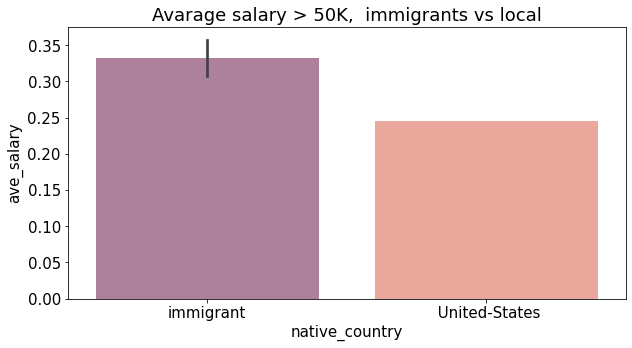

In [490]:
immigrant.native_country[immigrant.native_country != ' United-States'] = 'immigrant'
immigrant.append(local_data, ignore_index = True)
fig, axes = plt.subplots(figsize=(10, 5))
sns.barplot(data = immigrant, x = "native_country", y = "ave_salary", palette="rocket", alpha = 0.6).set(title = 'Avarage salary > 50K,  immigrants vs local')
plt.show()

> ## Third conclusion :
 
 
It can be seen from the table data, that out of 40 countries from which immigrants come, in 18 countries the percentage of workers earning over 50k is higher than the percentage of US residents.
This is something that is quite surprising, working in a foreign country with a different culture, probably not easy to integrate and understand the market.
But apparently people who take such a step as going out to work outside their country, are people who take risks, and ultimately taking risks brings in money, as we have also seen with the self-employed. And the challenging nature of these people, is probably what makes them put in large incomes.

---
### 8. Building a model from the data

We will try to predict mean score using decision tree, based on gender, race and test preparation.

Preparing the data for learning

In [536]:
my_model = sk.tree.DecisionTreeClassifier(criterion="gini", max_depth=3)

In [537]:
data['sex_cat'] = data['sex'].astype('category').cat.codes
data['education_cat'] = data['education'].astype('category').cat.codes
data.head(3)

,age,workclass,fnlwgt,education,education_num,marital_status,occupation,relationship,race,sex,...,hours_per_week_40,hours_per_week_cat,groups_age,groups_age_cat,sex_cat,relationship_cat,education_cat,occupation_cat,workclass_cat,native_country_cat
0,39,State-gov,77516,Bachelors,13,Never-married,Adm-clerical,Not-in-family,White,Male,...,"(39, 40]",1,"(30, 40]",2,1,1,9,1,7,39
1,50,Self-emp-not-inc,83311,Bachelors,13,Married-civ-spouse,Exec-managerial,Husband,White,Male,...,"(0, 39]",0,"(40, 50]",3,1,0,9,4,6,39
2,38,Private,215646,HS-grad,9,Divorced,Handlers-cleaners,Not-in-family,White,Male,...,"(39, 40]",1,"(30, 40]",2,1,1,11,6,4,39


In [538]:
features = ["sex_cat",'education_cat', 'age']
X = data[features]
y = data[['salary']]

In [539]:
X_train,X_test,y_train,y_test = train_test_split(X,y,test_size=0.3,random_state=42) 
y_test.head()

,salary
14160,0
27048,0
28868,1
5667,0
7827,0


In [540]:
print("Train STD of {}".format(y_train.std()))
print("Test STD of {}".format(y_test.std()))

Train STD of salary    0.428603
dtype: float64
Test STD of salary    0.425185
dtype: float64


In [541]:
model = DecisionTreeRegressor(random_state=42)
model.fit(X_train,y_train)

DecisionTreeRegressor(random_state=42)

In [542]:
def eval(x_test,y_test,model):
    pred = model.predict(x_test)
    print("MSE: {:.3f}".format(mean_squared_error(pred,y_test,squared=False)))

In [543]:
eval(X_test,y_test,model)

MSE: 0.376


In [544]:
import sklearn.tree as tree
def plot_tree(tree_model,feat,size=(15,10)):
    fig = plt.figure(figsize=size)
    tree.plot_tree(tree_model, 
                   feature_names = feat, 
                   filled=True,
                  fontsize=15)  
    plt.show()

MSE: 0.389


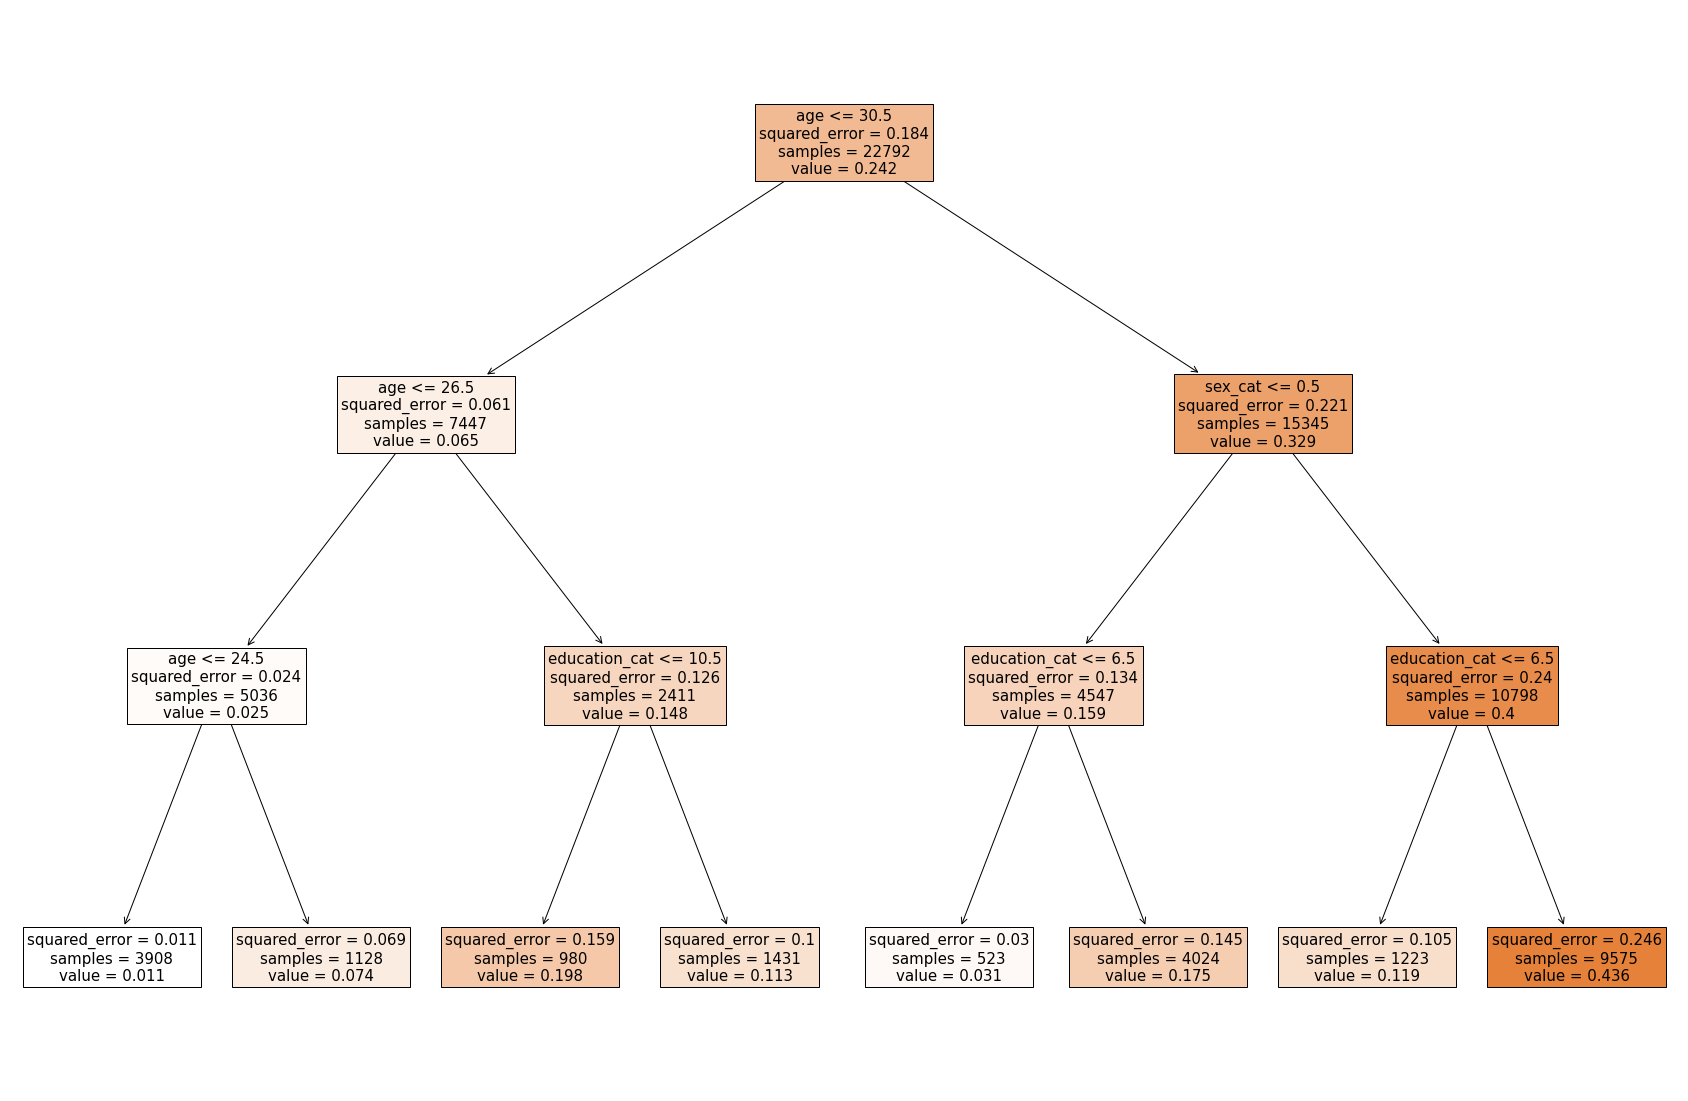

In [545]:
model = DecisionTreeRegressor(max_depth=3,random_state=42)
model.fit(X_train,y_train)

eval(X_test,y_test,model)
plot_tree(model,X_test.columns,size=(30,20))

In [546]:
model2 = sk.tree.DecisionTreeClassifier(criterion="gini")
model2.fit(X_train,y_train)

DecisionTreeClassifier()

In [547]:
prediction2 = model2.predict(X_test)
prediction2 

array([0, 0, 0, ..., 0, 0, 1], dtype=int64)

In [548]:
df = pd.DataFrame(columns = ['class', 'predictions'])

In [549]:
df['class'] = y_test
df = df.reset_index(drop=True)

In [550]:
df['predictions'] = pd.Series(prediction2)
df

,class,predictions
0,0,0
1,0,0
2,1,0
3,0,0
4,0,0
...,...,...
9764,0,0
9765,0,0
9766,0,0
9767,1,0


In [551]:
sk.metrics.accuracy_score(prediction2, y_test)

0.7967038591462791

Truth table

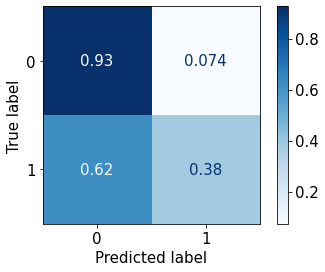

In [552]:
prediction2 = model2.predict(X_test)
cm = confusion_matrix(y_test, prediction2, labels=model2.classes_, normalize='true')
disp = ConfusionMatrixDisplay(confusion_matrix=cm, display_labels=model2.classes_)
disp.plot(cmap=plt.cm.Blues)
plt.show();